MARIMA ANDREW MAMBONDIUMWE- PROJECT 1, PART 2

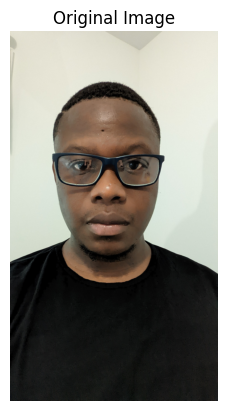

In [2]:
# Using OpenCV, NumPy and Matplotlib.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading my img.
img = cv2.imread('../Marima_Mambondiumwe_Pro1Part2/p2.jpg')

# Converting BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying the original Image
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

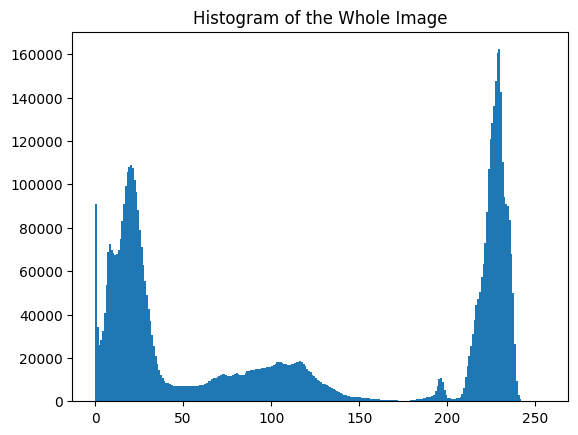

In [4]:
# Converting the Image to grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Creating a histogram.
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# Plotting the histogram.
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title('Histogram of the Full Image')
plt.show()

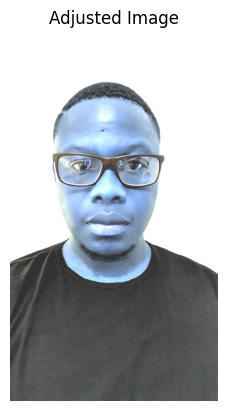

In [20]:
# Applying the contrast and brightness adjustments.
alpha = 1.5  # Contrast control (1.0 means no change)
beta = 50    # Brightness control (0 means no change)

adjust_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Displaying the adjusted Image.
adjust_img_rgb = cv2.cvtColor(adjust_img, cv2.COLOR_BGR2RGB)
plt.imshow(adjust_img_rgb)
plt.axis('off')
plt.title('Adjusted Image')
plt.show()

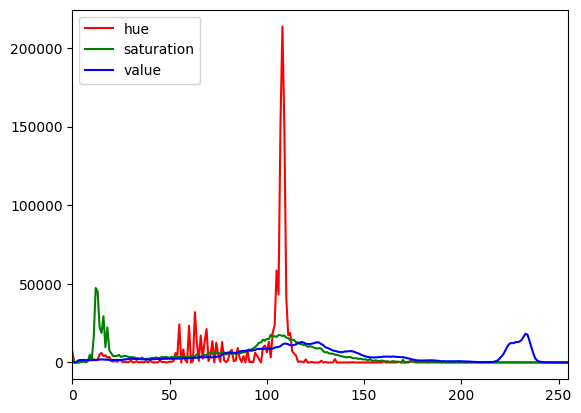

In [32]:
# Loading my Image.
img = cv2.imread('../Image Processing & Comp Vision/p2.jpg')

# I used Haar Cascade for face detection, Sources: https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/ and https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
# Loading the Haar Cascade classifier for face detection.
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converting the Image to grayscale for face detection.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detecting the face in the grayscale Image.
face = face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Creating an empty mask.
mask = np.zeros_like(gray_img)

# Iterating over the detected face and creating a mask for the face.
for (x, y, w, h) in face:
    # Setting the rectangle region to white(255).
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
    # Drawing the rectangle on the original image.
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Converting the Image to HSV color space.
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Applying the face mask to the HSV Image.
face_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)

# Calculating the histogram of the masked HSV Image.
hsv_hist = cv2.calcHist([face_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Displaying the image with the rectangle
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Image with Face Rectangle')
plt.show()


In [ ]:
# Plotting and displaying the masked HSV histogram.
# Creating a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])

# Adding a histogram to the plot.
plt.plot(hist, color='red')

# Limiting the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])

# Adding a histogram to the plot.
plt.plot(hist, color='green')

# Limiting the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])

# Adding a histogram to the plot.
plt.plot(hist, color='blue')

# Limiting the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Adding a legend.
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plotting the HSV histogram.
plt.show()

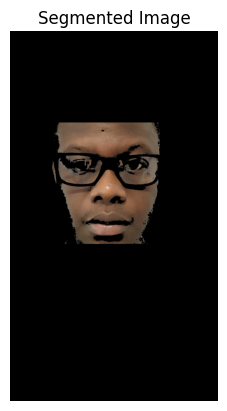

In [27]:
# Analyzing the histogram to determine the skin tone ranges.
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Creating a mask for skin tones based on the this range.
skintone_mask = cv2.inRange(face_hsv, lower_skin, upper_skin)

# Applying the skin tone mask to the original Image to segment the skin/face.
seg_img = cv2.bitwise_and(img, img, mask=skintone_mask)

# Displaying the segmented face.
seg_img_rgb = cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB)
plt.imshow(seg_img_rgb)
plt.axis('off')
plt.title('Segmented Image')
plt.show()
